In [1]:
import requests
from bs4 import BeautifulSoup
import json
from datetime import datetime, timedelta

def get_article_links_and_dates():
    base_url = 'https://www.theeagleonline.com/search?a=1&s=&ti=&ts_month=01&ts_day=1&ts_year=2009&te_month=05&te_day=14&te_year=2023&au=&tg=&ty=0'
    article_links_and_dates = {}

    start_date = datetime(2009, 1, 1)
    end_date = datetime.now()

    current_date = start_date
    iteration = 0

    while current_date <= end_date:
        date_str = current_date.strftime("%Y_%m_%d")
        url = base_url.replace('ts_year=2009', 'ts_year=' + str(current_date.year))
        url = url.replace('te_year=2023', 'te_year=' + str(current_date.year))
        url = url.replace('ts_month=01', 'ts_month=' + str(current_date.month).zfill(2))
        url = url.replace('te_month=05', 'te_month=' + str(current_date.month).zfill(2))
        r = requests.get(url)
        soup = BeautifulSoup(r.text, 'html.parser')

        articles = soup.find_all('article')

        for article in articles:
            link = article.find('a')['href']
            date = article.find('em').text.strip('()')
            try:
                date_obj = datetime.strptime(date, "%b %d, %Y")
            except ValueError:
                date_obj = datetime.strptime(date, "%m/%d/%y %I:%M%p")
            date_str = date_obj.strftime("%Y_%m_%d")

            if date_str in article_links_and_dates:
                if link in article_links_and_dates[date_str]:
                    print("Link already exists for", date_str)
                    continue
                else:
                    article_links_and_dates[date_str].append(link)
            else:
                article_links_and_dates[date_str] = [link]

            print("Added information for:", date_str)
            iteration += 1

        current_date = current_date + timedelta(days=1)

    with open('au_article_pages.json', 'w') as f:
        json.dump(article_links_and_dates, f, indent=4)

get_article_links_and_dates()

Added information for: 2009_02_12
Added information for: 2009_02_12
Added information for: 2009_02_12
Added information for: 2009_02_12
Added information for: 2009_02_12
Added information for: 2009_02_12
Added information for: 2009_02_12
Added information for: 2009_02_12
Added information for: 2009_02_12
Added information for: 2009_02_12
Added information for: 2009_02_12
Added information for: 2009_02_12
Added information for: 2009_02_12
Added information for: 2009_02_12
Added information for: 2009_02_12
Added information for: 2009_02_12
Added information for: 2009_02_12
Added information for: 2009_02_12
Added information for: 2009_02_12
Added information for: 2009_02_12
Link already exists for 2009_02_12
Link already exists for 2009_02_12
Link already exists for 2009_02_12
Link already exists for 2009_02_12
Link already exists for 2009_02_12
Link already exists for 2009_02_12
Link already exists for 2009_02_12
Link already exists for 2009_02_12
Link already exists for 2009_02_12
Link 

In [2]:
from helpers.txt_to_text import get_article_text
from helpers.make_txt_entry import make_txt_entry
import os
import json 

# Open the JSON file
with open('au_article_pages.json', 'r') as f:
    all_links_dates = json.load(f)

school_name = "AU"
dates = sorted(all_links_dates.keys())

for date in reversed(dates):
    articles = all_links_dates[date]
    file_path = "journal_data/txt/"+school_name.replace(" ","_")+"/"+date+".txt"
    if(os.path.exists(file_path)):
        print(f"Date {date} already added.")
    else:
        article_text = ""
        for article in articles:
            article_text += get_article_text(article) + "\n"
            
        make_txt_entry(school_name="AU", publication_date=date, text=article_text)
        print(f"Date {date} added.")

Date 2023_05_06 added.
Date 2023_05_05 added.
Date 2023_05_04 added.
Date 2023_05_03 added.
Date 2023_04_13 added.
Date 2023_04_12 added.
Date 2023_04_11 added.
Date 2023_04_10 added.
Date 2023_04_08 added.
Date 2023_04_07 added.
Date 2023_03_10 added.
Date 2023_03_09 added.
Date 2023_03_08 added.
Date 2023_03_07 added.
Date 2023_03_06 added.
Date 2023_02_13 added.
Date 2023_02_10 added.
Date 2023_02_09 added.
Date 2023_02_08 added.
Date 2023_02_07 added.
Date 2023_02_06 added.
Date 2023_02_03 added.
Date 2023_01_13 added.
Date 2023_01_05 added.
Date 2022_12_13 added.
Date 2022_12_12 added.
Date 2022_12_11 added.
Date 2022_12_09 added.
Date 2022_12_08 added.
Date 2022_11_11 added.
Date 2022_11_10 added.
Date 2022_11_09 added.
Date 2022_11_08 added.
Date 2022_11_07 added.
Date 2022_11_04 added.
Date 2022_11_03 added.
Date 2022_10_13 added.
Date 2022_10_12 added.
Date 2022_10_11 added.
Date 2022_10_10 added.
Date 2022_10_07 added.
Date 2022_09_13 added.
Date 2022_09_12 added.
Date 2022_0

grouped_data/csv/AU_Hillel.csv created.
grouped_data/pkl/yearly/AU_Hillel.pkl being created.


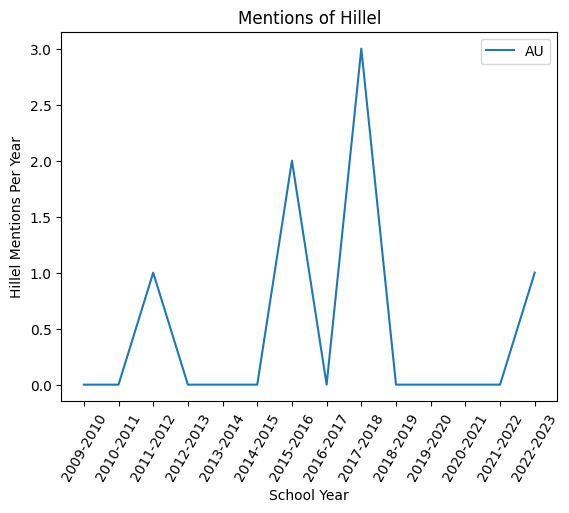

In [3]:
# Hyperparameters to Modify
school_name = 'AU'
string = "Hillel"
time_slice = 'yearly'

from helpers.graphers import grapher
from helpers.queries import count_query

school_names = [school_name]
save_pattern = '_'.join(school_names)+'_'+string.replace(' ','_')
grapher(school_names=school_names,
        pipeline=[],
        query=count_query(string),
        y_label=f"{string} Mentions Per Year",
        data_path="grouped_data",
        data_name=save_pattern,
        time_slice=time_slice,
        title=f"Mentions of {string}",
        img_path=f"figures/{school_name}/{save_pattern}_{time_slice}.png")